> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Movie Data Analysis; Determining revenue and popularity of movies (using tmdb data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

The dataset contains information about ~10,000 movies collected from The Movie Database (tmDB), including movie ratings and revenue. 

This project will answer the following research questions:

- #### Which genres are most popular from year to year?
  - What are the most common genres? (Top 5)
  - Overall what is the most popular genre over the years?
  
- #### What kinds of properties are associated with movies that have high revenues?
  - Is cast, production company important to high revenue?
  - What factors are more closely correlated with high revenue?
  - Which months out of the year see the highest revenue?
  

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


# <a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties:

#### Columns of movie dataset:
- **id**: index of movie in dataset

- **imdb_id**: Id according to imdb database

- **popularity**: How popular a movie is; the higher the better

- **budget**: Alloted resources($) for a movie to be made

- **revenue**: Total amount of sales($) from movie

- **original_title**: Title of movie

- **cast**: Main actor/actress, supporting actor/actress, etc.

- **homepage**: Website of movie; contains trailers, promotions, etc.

- **director**: Who directed the movie

- **tagline**: One-liner describing the movie designed to catch the viewer's attention

- **overview**: In-depth description/synopsis of the movie

- **runtime**: Length of the movie

- **genres**: What kind of movie

- **production_companies**: Studio associated with production of the movie

- **release_date**: Date when the movie was released to theaters

- **vote_count**: How many people voted/reviewed the movie

- **vote_average**: Average rating of the movie

- **release_year**: Year when movie was released to theaters

- **budget_adj**: Budget from when it was produced adjusted for inflation in 2010 dollars

- **revenue_adj**: Revenue from when it was produced adjusted for inflation in 2010 dollars

---

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df_tmdb = pd.read_csv('tmdb-movies.csv')
df_tmdb.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


---
#### Data types of columns in movie dataset

In [3]:
# shows datatypes of the dataframe columns
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
# Number of unique entries per column
df_tmdb.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [5]:
# To examine column datatypes

print("Column\t\t       Datatype")
print("="*31)
df_tmdb.dtypes

Column		       Datatype


id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

#### Shape of dataset

In [6]:
# rows, columns of movie data
df_tmdb.shape

(10866, 21)

#### columns with numerical datatype: 
- id, popularity, budget, revenue, runtime, vote_count, vote_average, release_year, budget_adj, revenue_adj
    
#### columns with string datatype: 
- imdb_id, original_title, cast, homepage, director, tagline, keywords, overview, genres, production_companies, release_date

---
### Converting data types
The **release_date** column needs to be converted into a DateTime object so it can be parsed more easily

In [7]:
# Turn into DateTime object
df_tmdb['release_date'] = pd.to_datetime(df_tmdb['release_date'])

In [8]:
df_tmdb.head(3) # check if conversion worked

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08


 Rename the budget_adj and revenue_adj columns to make more descriptive

In [9]:
df_tmdb.rename(columns = {'budget_adj' : 'budget_adj_usd_2010', 'revenue_adj' : 'revenue_adj_usd_2010'}, inplace = True)

In [10]:
df_tmdb.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj_usd_2010,revenue_adj_usd_2010
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09


### Examining the dataset

Checking for NaN/null values in dataset

There are missing/NaN values in the following columns: 
- imdb_id
- cast
- homepage
- director
- tagline
- keywords
- overview
- genres
- production_companies

In [11]:
# check for NaN values in columns
df_tmdb.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj_usd_2010        0
revenue_adj_usd_2010       0
dtype: int64

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [12]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


#### Check for duplicates:
- If duplicates exist, then drop the row(s)

In [13]:
df_tmdb[df_tmdb.duplicated()] # check duplicated rows

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj_usd_2010,revenue_adj_usd_2010
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,2010-03-20,110,5.0,2010,30000000.0,967000.0


In [14]:
df_tmdb = df_tmdb.drop_duplicates() # drop duplicates

### Dropping specific columns

The following columns are to be dropped as the data in those columns should have no bearing on answering the research questions.

- id, imdb_id, homepage, budget, revenue
- budget_adj and revenue_adj are already in the dataset; no need to repeat the same type of data (budget and revenue)

In [15]:
# don't see how the following columns are useful/relevant in answering 
# the research questions so drop them; makes the data more simpler to analyze
df_tmdb.drop(['imdb_id', 'homepage', 'budget', 'keywords', 'revenue', 'tagline', 'overview'], axis=1, inplace=True)

# budget/revenue are already accounted for in budget_adj, revenue_adj
# production_companies (on the fence about this, leave it in for now)

### Dropping specific rows

These rows have NaN values; drop them as they are not useful in answering the research questions and the amount of rows lost are negligible

In [16]:
# These rows have no genre listed; 
# they are not useful in answering the popularity of genre question
df_tmdb = df_tmdb.dropna(subset=['genres'])

In [17]:
# Review null column data
df_tmdb.isnull().sum()

id                         0
popularity                 0
original_title             0
cast                      75
director                  42
runtime                    0
genres                     0
production_companies    1016
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj_usd_2010        0
revenue_adj_usd_2010       0
dtype: int64

In [18]:
df_tmdb.describe() # general statistics of movie data

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj_usd_2010,revenue_adj_usd_2010
count,10842.000000,10842.000000,10842.000000,10842.000000,10842.000000,10842.000000,1.084200e+04,1.084200e+04
mean,65870.675521,0.647461,102.138443,217.823649,5.974064,2001.314794,1.758712e+07,5.147797e+07
std,91981.355752,1.001032,31.294612,576.180993,0.934257,12.813617,3.433437e+07,1.447723e+08
min,5.000000,0.000065,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10589.250000,0.208210,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20557.000000,0.384532,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75186.000000,0.715393,111.000000,146.000000,6.600000,2011.000000,2.092507e+07,3.387838e+07
max,417859.000000,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Review dataframe after cleaning

In [19]:
df_tmdb

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj_usd_2010,revenue_adj_usd_2010
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,9.110700,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,2015-12-25,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,8.654359,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,2015-06-23,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,7.667400,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,2015-09-30,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,7.404165,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,2015-06-17,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,6.326804,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,2015-06-09,3935,8.0,2015,1.609999e+08,7.854116e+08


### Possible incorrect raw data

It seems like the raw dataset regarding the adjusted budget and revenue is incorrect as the rows containing 0 for both columns exceed 30% of the dataset.

In [20]:
df_tmdb[df_tmdb['revenue_adj_usd_2010'] == 0] # 5993 rows where revenue/revenue_adj is 0
# looks like the data is incorrect or most movies don't generate revenue
# not even negative revenue

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj_usd_2010,revenue_adj_usd_2010
48,265208,2.932340,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,Simon West,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,2015-01-14,481,5.3,2015,2.759999e+07,0.0
67,334074,2.331636,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,James McTeigue,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,2015-05-21,280,5.4,2015,1.839999e+07,0.0
74,347096,2.165433,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,Anne K. Black,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,2015-06-24,27,5.1,2015,0.000000e+00,0.0
75,308369,2.141506,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,Alfonso Gomez-Rejon,105,Comedy|Drama,Indian Paintbrush,2015-06-12,569,7.7,2015,0.000000e+00,0.0
92,370687,1.876037,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,A. Todd Smith,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,2015-12-19,11,5.4,2015,0.000000e+00,0.0
93,307663,1.872696,Vice,Ambyr Childers|Thomas Jane|Bryan Greenberg|Bru...,Brian A Miller,96,Thriller|Science Fiction|Action|Adventure,Grindstone Entertainment Group|K5 Internationa...,2015-01-16,181,4.1,2015,9.199996e+06,0.0
100,326359,1.724712,Frozen Fever,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,Chris Buck|Jennifer Lee,8,Adventure|Animation|Family,Walt Disney Pictures|Walt Disney Animation Stu...,2015-03-09,475,7.0,2015,0.000000e+00,0.0
101,254302,1.661789,High-Rise,Tom Hiddleston|Sienna Miller|Jeremy Irons|Luke...,Ben Wheatley,119,Action|Drama|Science Fiction,Ingenious Media|HanWay Films|Scope Pictures|Re...,2015-09-26,161,5.4,2015,0.000000e+00,0.0
103,292040,1.646664,Spooks: The Greater Good,Peter Firth|Kit Harington|Jennifer Ehle|Lara P...,Bharat Nalluri,104,Thriller|Action,BBC Films|Isle of Man Film|Shine Pictures|Kudo...,2015-04-11,114,5.6,2015,0.000000e+00,0.0
116,297291,1.380320,The Scorpion King: The Lost Throne,Victor Webster|Ellen Hollman|Barry Bostwick|Wi...,Mike Elliott,105,Action|Fantasy|Adventure,Universal Pictures,2015-01-09,22,4.5,2015,0.000000e+00,0.0


In [21]:
df_tmdb[df_tmdb['budget_adj_usd_2010'] == 0] # 5674 rows where budget/budget_adj is 0
# looks like the data is incorrect or most movies don't have a budget 

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj_usd_2010,revenue_adj_usd_2010
30,280996,3.927333,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,Bill Condon,103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,2015-06-19,425,6.4,2015,0.0,2.700677e+07
36,339527,3.358321,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,Afonso Poyart,101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,2015-09-03,474,6.2,2015,0.0,2.056620e+07
72,284289,2.272044,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,Jean-Baptiste LÃ©onetti,95,Thriller,Furthur Films,2015-04-17,81,5.5,2015,0.0,4.222338e+04
74,347096,2.165433,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,Anne K. Black,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,2015-06-24,27,5.1,2015,0.0,0.000000e+00
75,308369,2.141506,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,Alfonso Gomez-Rejon,105,Comedy|Drama,Indian Paintbrush,2015-06-12,569,7.7,2015,0.0,0.000000e+00
88,301875,1.959765,Equals,Kristen Stewart|Nicholas Hoult|Guy Pearce|Jack...,Drake Doremus,101,Drama|Romance|Science Fiction,Scott Free Productions|Infinite Frameworks Stu...,2015-09-04,135,5.6,2015,0.0,1.839999e+06
92,370687,1.876037,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,A. Todd Smith,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,2015-12-19,11,5.4,2015,0.0,0.000000e+00
95,258509,1.841779,Alvin and the Chipmunks: The Road Chip,Jason Lee|Justin Long|Bella Thorne|Matthew Gra...,Walt Becker,92,Adventure|Animation|Comedy|Family,Regency Enterprises|Fox 2000 Pictures|Sunswept...,2015-12-17,278,5.7,2015,0.0,2.150550e+08
100,326359,1.724712,Frozen Fever,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,Chris Buck|Jennifer Lee,8,Adventure|Animation|Family,Walt Disney Pictures|Walt Disney Animation Stu...,2015-03-09,475,7.0,2015,0.0,0.000000e+00
101,254302,1.661789,High-Rise,Tom Hiddleston|Sienna Miller|Jeremy Irons|Luke...,Ben Wheatley,119,Action|Drama|Science Fiction,Ingenious Media|HanWay Films|Scope Pictures|Re...,2015-09-26,161,5.4,2015,0.0,0.000000e+00


<a id='eda'></a>
## Exploratory Data Analysis (Plotting and Visualization)

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1: Which genres are most popular from year to year? 

In [22]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


#### Examine popularity column statistics

In [23]:
df_tmdb.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            10856, 10857, 10858, 10859, 10860, 10861, 10862, 10863, 10864,
            10865],
           dtype='int64', length=10842)

In [24]:
# Popularity statistics
df_tmdb['popularity'].describe()

count    10842.000000
mean         0.647461
std          1.001032
min          0.000065
25%          0.208210
50%          0.384532
75%          0.715393
max         32.985763
Name: popularity, dtype: float64

In [25]:
# More detailed description of popularity statistics
df_tmdb['popularity'].describe(percentiles=[.1, .2, .3, .4, .5, .6, .7, .8, .9, .95, .975, .98, .985, .99, .995, .9975, .9995, .9999, 1.0])

count     10842.000000
mean          0.647461
std           1.001032
min           0.000065
10%           0.106765
20%           0.175478
30%           0.239889
40%           0.306406
50%           0.384532
60%           0.477838
70%           0.615513
80%           0.863219
90%           1.352412
95%           2.049736
97.5%         2.944534
98%           3.204727
98.5%         3.746451
99%           4.583094
99.5%         5.977234
99.75%        7.664363
99.95%       12.578661
99.99%       28.128042
100%         32.985763
max          32.985763
Name: popularity, dtype: float64

Since the genre question asks for popularity,

Investigating the popularity column of the dataset reveals
the top .01% of movies are the most popular, followed by the top .05%.
The movies within the top 10% are considered the most popular; the rest are comparatively not.


In [26]:
# Create a new popularity_level column that functions like a more reliable system for popularity
popularity_edges = [0.000065, 0.106772, 0.175501, 0.239908, 0.306419, 0.384555, 0.477858, 0.615502, 0.863203, 1.352335, 32.985763] 
popularity_levels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]     # on a scale of 1 - 10
df_tmdb['popularity_level'] = pd.cut(df_tmdb['popularity'], popularity_edges, labels=popularity_levels)

In [27]:
# check if popularity_level column added to dataframe
df_tmdb.head()

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj_usd_2010,revenue_adj_usd_2010,popularity_level
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,10
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,10
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,10
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,10
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,10


In [28]:
# Get subset of original dataset to answer question 1
# popularity, genres, release year
# title for merging columns
df_pop_genres_yr = df_tmdb.loc[:, ['popularity', 'genres', 'release_year', 'popularity_level']]

In [29]:
df_pop_genres_yr.head()

,popularity,genres,release_year,popularity_level
0,32.985763,Action|Adventure|Science Fiction|Thriller,2015,10
1,28.419936,Action|Adventure|Science Fiction|Thriller,2015,10
2,13.112507,Adventure|Science Fiction|Thriller,2015,10
3,11.173104,Action|Adventure|Science Fiction|Fantasy,2015,10
4,9.335014,Action|Crime|Thriller,2015,10


In [30]:
# Tallies the genres of all movies
genres = pd.Series(df_pop_genres_yr['genres']).str.get_dummies(sep='|')
genres.sum().sort_values(ascending=False)

Drama              4760
Comedy             3793
Thriller           2907
Action             2384
Romance            1712
Horror             1637
Adventure          1471
Crime              1354
Family             1231
Science Fiction    1229
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
dtype: int64

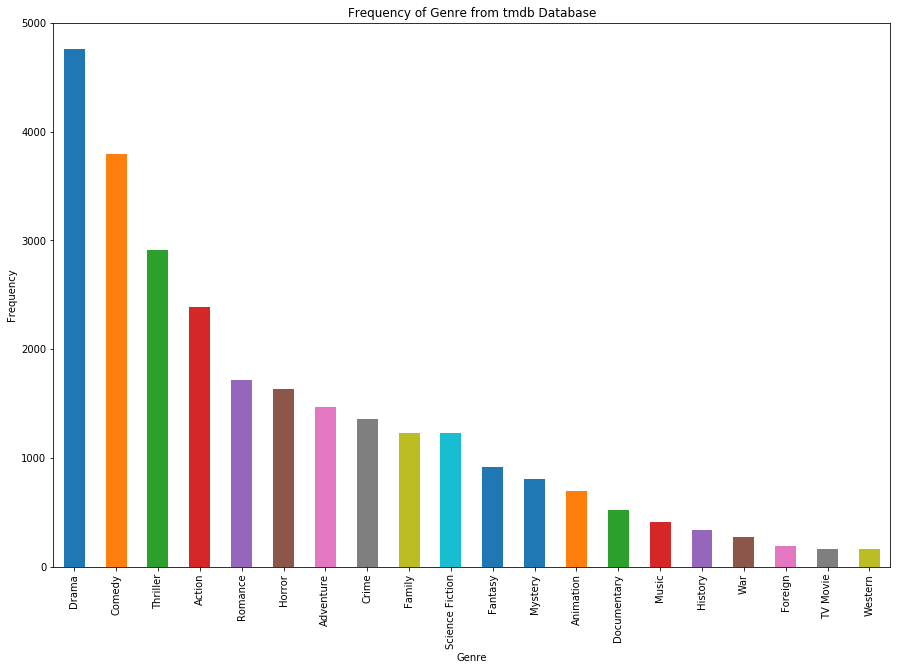

In [31]:
# Graph displays count for each genre
genres.sum().sort_values(ascending=False).plot(kind='bar', title='Frequency of Genre from tmdb Database', figsize=(15, 10));
plt.xlabel('Genre');
plt.ylabel('Frequency');

The top 5 most common genres:
1. Drama
2. Comedy
3. Thriller
4. Action
5. Romance

In [32]:
df_pop_genres_yr.head(10)

,popularity,genres,release_year,popularity_level
0,32.985763,Action|Adventure|Science Fiction|Thriller,2015,10
1,28.419936,Action|Adventure|Science Fiction|Thriller,2015,10
2,13.112507,Adventure|Science Fiction|Thriller,2015,10
3,11.173104,Action|Adventure|Science Fiction|Fantasy,2015,10
4,9.335014,Action|Crime|Thriller,2015,10
5,9.110700,Western|Drama|Adventure|Thriller,2015,10
6,8.654359,Science Fiction|Action|Thriller|Adventure,2015,10
7,7.667400,Drama|Adventure|Science Fiction,2015,10
8,7.404165,Family|Animation|Adventure|Comedy,2015,10
9,6.326804,Comedy|Animation|Family,2015,10


Function courtesy of <a href=https://github.com/cognoma/genes/blob/721204091a96e55de6dcad165d6d8265e67e2a48/2.process.py#L61-L95>Project Cognoma</a>

In [33]:
def tidy_split(df, column, sep='|', keep=False):
    """
    Split the values of a column and expand so the new DataFrame has one split
    value per row. Filters rows where the column is missing.
    
    Params
    ------
    df : pandas.DataFrame
        dataframe with the column to split and expand
    column : str
        the column to split and expand
    sep : str
        the string used to split the column's values
    keep : bool
        whether to retain the presplit value as it's own row
    
    Returns
    -------
    pandas.DataFrame
        Returns a dataframe with the same columns as `df`.
    """
    indexes = list()
    new_values = list()
    df = df.dropna(subset=[column])
    for i, presplit in enumerate(df[column].astype(str)):
        values = presplit.split(sep)
        if keep and len(values) > 1:
            indexes.append(i)
            new_values.append(presplit)
        for value in values:
            indexes.append(i)
            new_values.append(value)
    new_df = df.iloc[indexes, :].copy()
    new_df[column] = new_values
    return new_df

In [34]:
genres_pop_df = tidy_split(df_pop_genres_yr, 'genres')
genres_pop_df.drop(['popularity_level'], axis=1, inplace=True)
genres_pop_df.head()

,popularity,genres,release_year
0,32.985763,Action,2015
0,32.985763,Adventure,2015
0,32.985763,Science Fiction,2015
0,32.985763,Thriller,2015
1,28.419936,Action,2015


In [35]:
genres_pop_yr_df = genres_pop_df.groupby(['release_year', 'genres'], as_index=False)['popularity'].mean()
genres_pop_yr_df

,release_year,genres,popularity
0,1960,Action,0.590724
1,1960,Adventure,0.700981
2,1960,Comedy,0.396000
3,1960,Crime,0.346480
4,1960,Drama,0.566305
5,1960,Family,0.278064
6,1960,Fantasy,0.428247
7,1960,Foreign,0.194948
8,1960,History,0.412364
9,1960,Horror,0.591450


In [36]:
# Create a dataframe with just the selected genre in question
def separate_genre_df_generator(df, gen):
    df_genre = df[df.genres == gen]
    return df_genre

In [37]:
# All possible genres listed
genres_pop_yr_df.genres.unique()

array(['Action', 'Adventure', 'Comedy', 'Crime', 'Drama', 'Family',
       'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Romance',
       'Science Fiction', 'Thriller', 'War', 'Western', 'Animation',
       'Mystery', 'TV Movie', 'Documentary'], dtype=object)

In [38]:
# Generate the dfs for each genre; for popularity line plot

df_pop_action_yr = separate_genre_df_generator(genres_pop_yr_df, 'Action')
df_pop_adventure_yr = separate_genre_df_generator(genres_pop_yr_df, 'Adventure')
df_pop_comedy_yr = separate_genre_df_generator(genres_pop_yr_df, 'Comedy')
df_pop_crime_yr = separate_genre_df_generator(genres_pop_yr_df, 'Crime')
df_pop_drama_yr = separate_genre_df_generator(genres_pop_yr_df, 'Drama')
df_pop_family_yr = separate_genre_df_generator(genres_pop_yr_df, 'Family')
df_pop_fantasy_yr = separate_genre_df_generator(genres_pop_yr_df, 'Fantasy')
df_pop_foreign_yr = separate_genre_df_generator(genres_pop_yr_df, 'Foreign')
df_pop_history_yr = separate_genre_df_generator(genres_pop_yr_df, 'History')
df_pop_horror_yr = separate_genre_df_generator(genres_pop_yr_df, 'Horror')
df_pop_music_yr = separate_genre_df_generator(genres_pop_yr_df, 'Music')
df_pop_romance_yr = separate_genre_df_generator(genres_pop_yr_df, 'Romance')
df_pop_scifi_yr = separate_genre_df_generator(genres_pop_yr_df, 'Science Fiction')
df_pop_thriller_yr = separate_genre_df_generator(genres_pop_yr_df, 'Thriller')
df_pop_war_yr = separate_genre_df_generator(genres_pop_yr_df, 'War')
df_pop_western_yr = separate_genre_df_generator(genres_pop_yr_df, 'Western')
df_pop_anime_yr = separate_genre_df_generator(genres_pop_yr_df, 'Animation')
df_pop_mystery_yr = separate_genre_df_generator(genres_pop_yr_df, 'Mystery')
df_pop_tvmovie_yr = separate_genre_df_generator(genres_pop_yr_df, 'TV Movie')
df_pop_documentary_yr = separate_genre_df_generator(genres_pop_yr_df, 'Documentary')

### The following graphs show the trends (popularity) of movie genres over the years

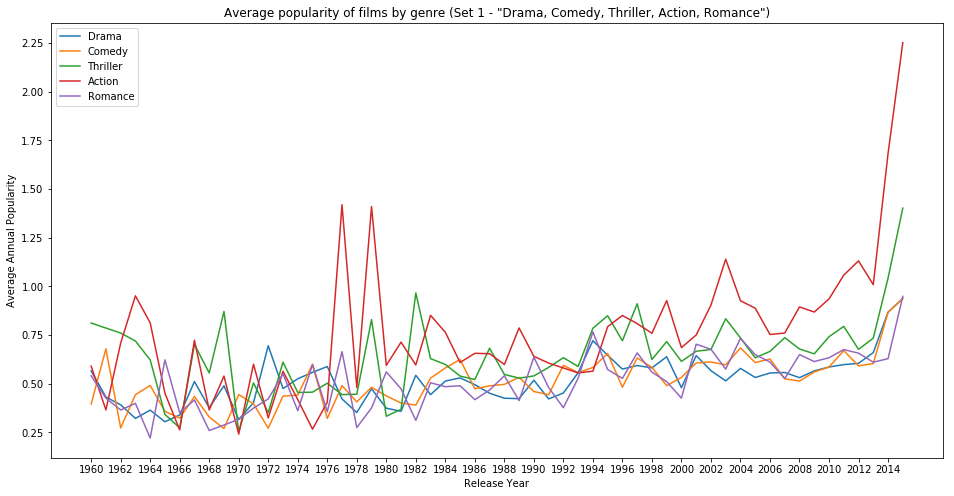

In [39]:
# Set 1: Drama, Comedy, Thriller, Action, Romance
fig, ax = plt.subplots(figsize=(16, 8))
plt.title('Average popularity of films by genre (Set 1 - "Drama, Comedy, Thriller, Action, Romance")')
plt.ylabel('Average Annual Popularity')
plt.xlabel('Release Year')

plt.xticks(np.arange(1960, 2016, 2))
ax.plot('release_year', 'popularity', data=df_pop_drama_yr, label="Drama")
ax.plot('release_year', 'popularity', data=df_pop_comedy_yr, label="Comedy")
ax.plot('release_year', 'popularity', data=df_pop_thriller_yr, label="Thriller")
ax.plot('release_year', 'popularity', data=df_pop_action_yr, label="Action")
ax.plot('release_year', 'popularity', data=df_pop_romance_yr, label="Romance")
ax.legend(loc='upper left');

Set 1: Action is most popular, followed by Thriller, then Romance/Comedy

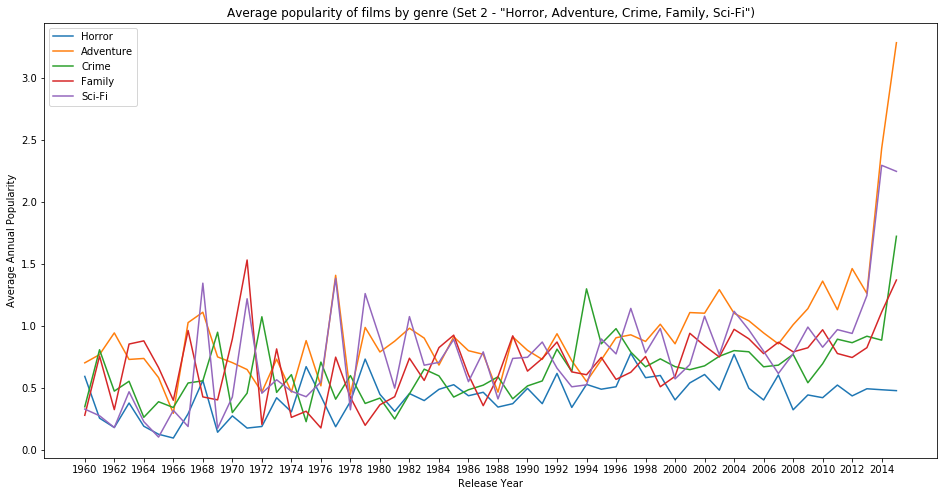

In [40]:
# Set 2: Horror, Adventure, Crime, Family, Sci-Fi
fig, ax = plt.subplots(figsize=(16, 8))
plt.title('Average popularity of films by genre (Set 2 - "Horror, Adventure, Crime, Family, Sci-Fi")')
plt.ylabel('Average Annual Popularity')
plt.xlabel('Release Year')

plt.xticks(np.arange(1960, 2016, 2))
ax.plot('release_year', 'popularity', data=df_pop_horror_yr, label="Horror")
ax.plot('release_year', 'popularity', data=df_pop_adventure_yr, label="Adventure")
ax.plot('release_year', 'popularity', data=df_pop_crime_yr, label="Crime")
ax.plot('release_year', 'popularity', data=df_pop_family_yr, label="Family")
ax.plot('release_year', 'popularity', data=df_pop_scifi_yr, label="Sci-Fi")
ax.legend(loc='upper left');

Set 2: Adventure, Sci-Fi, Family

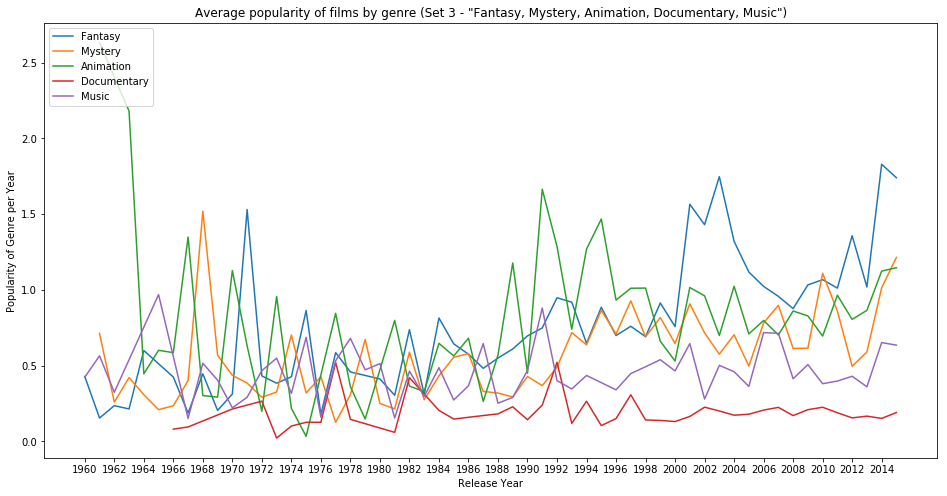

In [41]:
# Set 3: Fantasy, Mystery, Animation, Documentary, Music
fig, ax = plt.subplots(figsize=(16, 8))
plt.title('Average popularity of films by genre (Set 3 - "Fantasy, Mystery, Animation, Documentary, Music")')
plt.ylabel('Popularity of Genre per Year')
plt.xlabel('Release Year')

plt.xticks(np.arange(1960, 2016, 2))
ax.plot('release_year', 'popularity', data=df_pop_fantasy_yr, label="Fantasy")
ax.plot('release_year', 'popularity', data=df_pop_mystery_yr, label="Mystery")
ax.plot('release_year', 'popularity', data=df_pop_anime_yr, label="Animation")
ax.plot('release_year', 'popularity', data=df_pop_documentary_yr, label="Documentary")
ax.plot('release_year', 'popularity', data=df_pop_music_yr, label="Music")
ax.legend(loc='upper left');

Set 3: Fantasy, Animation, Mystery
- some missing data from ~(1960-1966)

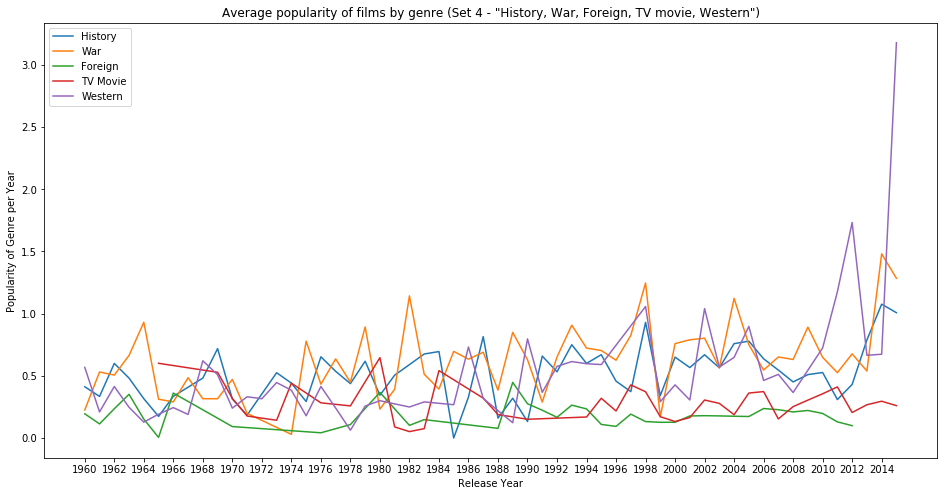

In [42]:
# Set 4: History, War, Foreign, TV movie, Western
fig, ax = plt.subplots(figsize=(16, 8))
plt.title('Average popularity of films by genre (Set 4 - "History, War, Foreign, TV movie, Western")')
plt.ylabel('Popularity of Genre per Year')
plt.xlabel('Release Year')

plt.xticks(np.arange(1960, 2016, 2))
ax.plot('release_year', 'popularity', data=df_pop_history_yr, label="History")
ax.plot('release_year', 'popularity', data=df_pop_war_yr, label="War")
ax.plot('release_year', 'popularity', data=df_pop_foreign_yr, label="Foreign")
ax.plot('release_year', 'popularity', data=df_pop_tvmovie_yr, label="TV Movie")
ax.plot('release_year', 'popularity', data=df_pop_western_yr, label="Western")
ax.legend(loc='upper left');

Set 4: War, History, Western
- also some missing data; negligible

In [43]:
# Create a dataframe that lists the overall popularity of each genre
df_genres_list = [df_pop_action_yr, df_pop_adventure_yr, df_pop_comedy_yr, df_pop_crime_yr,
                  df_pop_drama_yr, df_pop_family_yr, df_pop_fantasy_yr, df_pop_foreign_yr,
                  df_pop_history_yr, df_pop_horror_yr, df_pop_music_yr, df_pop_romance_yr,
                  df_pop_scifi_yr, df_pop_thriller_yr, df_pop_war_yr, df_pop_western_yr,
                  df_pop_anime_yr, df_pop_mystery_yr, df_pop_tvmovie_yr, df_pop_documentary_yr]
genre_list = genres_pop_yr_df.genres.unique()

df_popularity_genre_overall = pd.DataFrame(index=genre_list, columns=['overall_popularity'])
for df, genre in zip(df_genres_list, genre_list):
    df_popularity_genre_overall.loc[genre] = pd.Series({'overall_popularity':df.popularity.sum()})

# sorted by most to least popularity
df_popularity_genre_overall.sort_values(by=['overall_popularity'], ascending=False)

,overall_popularity
Adventure,52.5071
Science Fiction,42.6525
Animation,42.5235
Action,42.4636
Fantasy,41.2652
Family,38.501
Crime,36.0116
Thriller,35.4838
War,33.8433
Mystery,31.3539


The most popular genre overall would be: Adventure

Followed by Science Fiction, Animation, Action, then Fantasy

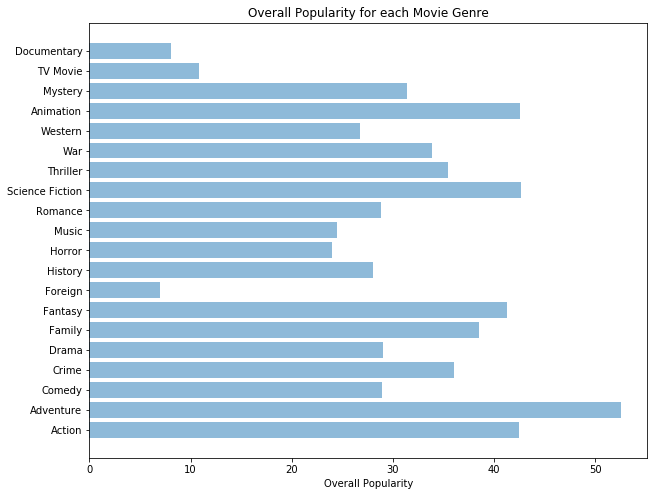

In [44]:
# Horizontal bar chart illustrating above dataframe
objects = list(genre_list)
y_pos = np.arange(len(objects))
fig = plt.figure(figsize=(10,8));
plt.barh(y_pos, df_popularity_genre_overall.overall_popularity, align='center', alpha=0.5)
plt.xlabel('Overall Popularity')
plt.yticks(y_pos, objects)
plt.title('Overall Popularity for each Movie Genre');

### Research Question 2: What kinds of properties are associated with movies that have high revenues?

Here we will examine some potential factors on movies with high revenue.

In [45]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


In [46]:
# Prepare subset of original dataset 
# Drop NaN rows
df_tmdb_cleaned = df_tmdb.dropna()
#df_tmdb_cleaned = df_tmdb_cleaned.drop(columns=['id', 'imdb_id', 'tagline', 'keywords', 'overview', 'budget', 'revenue', 'homepage'])
df_tmdb_cleaned.head()

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj_usd_2010,revenue_adj_usd_2010,popularity_level
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,10
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,10
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,10
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,10
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,10


Curious about the cast and production companies variables on revenue

In [47]:
# Separate the string '|' and make a dataframe with the cast and revenue
df_cast = df_tmdb_cleaned.loc[:, ['original_title', 'cast']]
cast_list = df_cast['cast'].str.split('|').tolist()
df_cast_list = pd.DataFrame(cast_list, index=df_cast['original_title']).stack()
df_cast_list.head()

original_title   
Jurassic World  0            Chris Pratt
                1    Bryce Dallas Howard
                2            Irrfan Khan
                3      Vincent D'Onofrio
                4          Nick Robinson
dtype: object

In [48]:
df_cast_list = df_cast_list.reset_index()
df_cast_list = df_cast_list.rename(columns={0: 'cast_member'})
df_cast_list = df_cast_list.drop(columns=['level_1'])
df_cast_list.head(15)

,original_title,cast_member
0,Jurassic World,Chris Pratt
1,Jurassic World,Bryce Dallas Howard
2,Jurassic World,Irrfan Khan
3,Jurassic World,Vincent D'Onofrio
4,Jurassic World,Nick Robinson
5,Mad Max: Fury Road,Tom Hardy
6,Mad Max: Fury Road,Charlize Theron
7,Mad Max: Fury Road,Hugh Keays-Byrne
8,Mad Max: Fury Road,Nicholas Hoult
9,Mad Max: Fury Road,Josh Helman


In [49]:
# Result is dataframe with revenue, cast member only
df_cast_rev = pd.merge(df_tmdb_cleaned.loc[:,('original_title', 'revenue_adj_usd_2010')], df_cast_list, on='original_title', how='left')
df_cast_rev = df_cast_rev.drop(columns='original_title')
df_cast_rev = df_cast_rev.sort_values('revenue_adj_usd_2010', ascending=False)
df_cast_rev

,revenue_adj_usd_2010,cast_member
6374,2.827124e+09,Michelle Rodriguez
6371,2.827124e+09,Zoe Saldana
6373,2.827124e+09,Stephen Lang
6372,2.827124e+09,Sigourney Weaver
6370,2.827124e+09,Sam Worthington
6071,2.789712e+09,Mark Hamill
6072,2.789712e+09,Harrison Ford
6075,2.789712e+09,Alec Guinness
6074,2.789712e+09,Peter Cushing
6073,2.789712e+09,Carrie Fisher


Looks like high revenue movies are somewhat associated with A-list cast; although it is not a requirement for high revenue.

In [50]:
# Do the same thing as the cast and apply to production companies
df_pro_comps = df_tmdb_cleaned.loc[:, ['original_title', 'production_companies']]
pro_comp_list = df_pro_comps['production_companies'].str.split('|').tolist()
df_pro_comp_list = pd.DataFrame(pro_comp_list, index=df_pro_comps['original_title']).stack()
df_pro_comp_list.head()

original_title   
Jurassic World  0          Universal Studios
                1       Amblin Entertainment
                2         Legendary Pictures
                3    Fuji Television Network
                4                     Dentsu
dtype: object

In [51]:
df_pro_comp_list = df_pro_comp_list.reset_index()
df_pro_comp_list = df_pro_comp_list.rename(columns={0: 'production_company'})
df_pro_comp_list = df_pro_comp_list.drop(columns=['level_1'])
df_pro_comp_list.head(15)

,original_title,production_company
0,Jurassic World,Universal Studios
1,Jurassic World,Amblin Entertainment
2,Jurassic World,Legendary Pictures
3,Jurassic World,Fuji Television Network
4,Jurassic World,Dentsu
5,Mad Max: Fury Road,Village Roadshow Pictures
6,Mad Max: Fury Road,Kennedy Miller Productions
7,Insurgent,Summit Entertainment
8,Insurgent,Mandeville Films
9,Insurgent,Red Wagon Entertainment


In [52]:
df_pro_comp_rev = pd.merge(df_tmdb_cleaned.loc[:,('original_title', 'revenue_adj_usd_2010')], df_pro_comp_list, on='original_title', how='left')
df_pro_comp_rev = df_pro_comp_rev.drop(columns='original_title')
df_pro_comp_rev = df_pro_comp_rev.sort_values('revenue_adj_usd_2010', ascending=False)
df_pro_comp_rev

,revenue_adj_usd_2010,production_company
3286,2.827124e+09,Ingenious Film Partners
3287,2.827124e+09,Twentieth Century Fox Film Corporation
3288,2.827124e+09,Dune Entertainment
3289,2.827124e+09,Lightstorm Entertainment
3188,2.789712e+09,Twentieth Century Fox Film Corporation
3187,2.789712e+09,Lucasfilm
12322,2.506406e+09,American Zoetrope
12321,2.506406e+09,Lightstorm Entertainment
12320,2.506406e+09,Twentieth Century Fox Film Corporation
12319,2.506406e+09,Paramount Pictures


This shows breakdown of the movie studios that generate top revenue in movies. Famous studios are also associated with high revenue, although not a guarantee for high revenue.

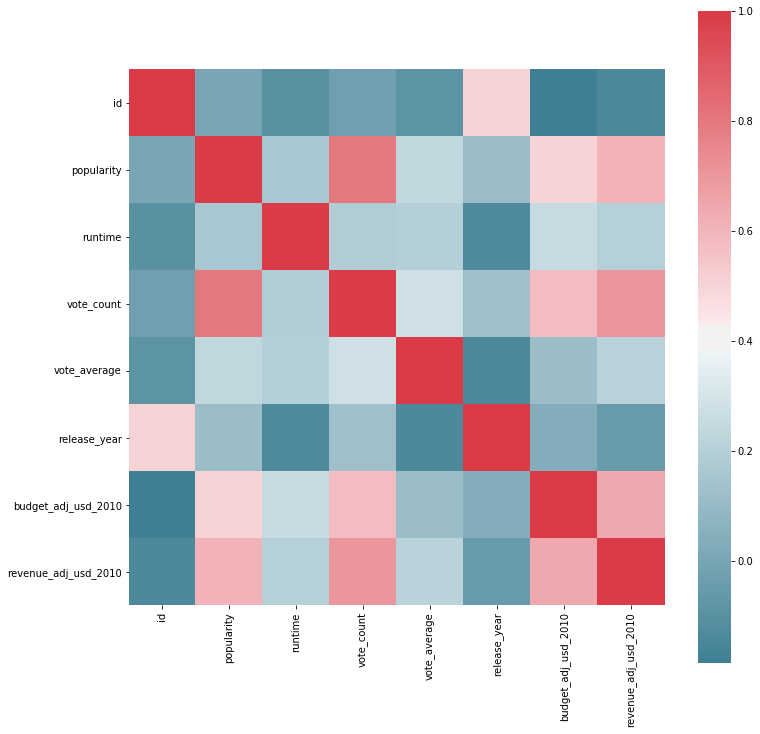

In [53]:
# Check for correlation for high revenue using the original dataframe
fig, ax = plt.subplots(figsize=(12,12))
corr = df_tmdb_cleaned.corr(method='pearson')
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax);

## According to the matrix:

High correlation factors for revenue:
- budget, vote count, popularity

Medium correlation factors for revenue:
- runtime, vote average

Low correlation factors for revenue:
- id, release year

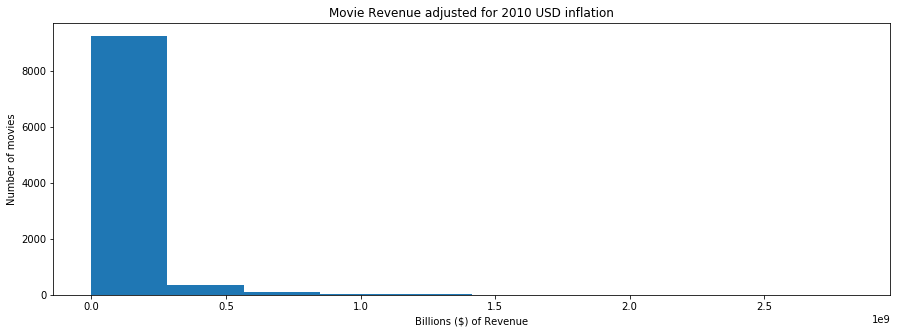

In [54]:
# Most movies do not report high revenue; graph skewed to the right
df_tmdb_cleaned['revenue_adj_usd_2010'].plot(kind='hist', figsize=(15,5));
plt.title("Movie Revenue adjusted for 2010 USD inflation");
plt.xlabel("Billions ($) of Revenue");
plt.ylabel("Number of movies");

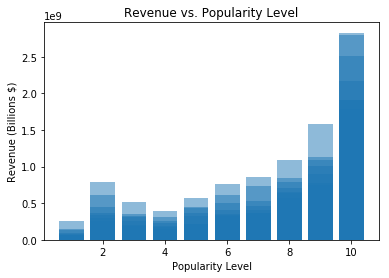

In [55]:
# Revenue vs. Popularity Level
plt.bar(df_tmdb_cleaned['popularity_level'], df_tmdb_cleaned['revenue_adj_usd_2010'], alpha=0.5)
plt.xlabel('Popularity Level');
plt.ylabel('Revenue (Billions $)');
plt.title('Revenue vs. Popularity Level');

The more popular movies bring the most revenue; Even movies with a popularity level of 2 can bring revenue; Matches with the above matrix

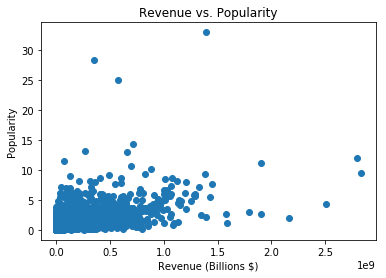

In [56]:
# Revenue vs. Popularity
plt.scatter(x=df_tmdb_cleaned['revenue_adj_usd_2010'], y=df_tmdb_cleaned['popularity'])
plt.xlabel('Revenue (Billions $)');
plt.ylabel('Popularity');
plt.title('Revenue vs. Popularity');

Majority of movies are not popular and do not generate a lot of revenue; The high revenues are outliers

### Which months out of the year experience the highest movie revenue? 

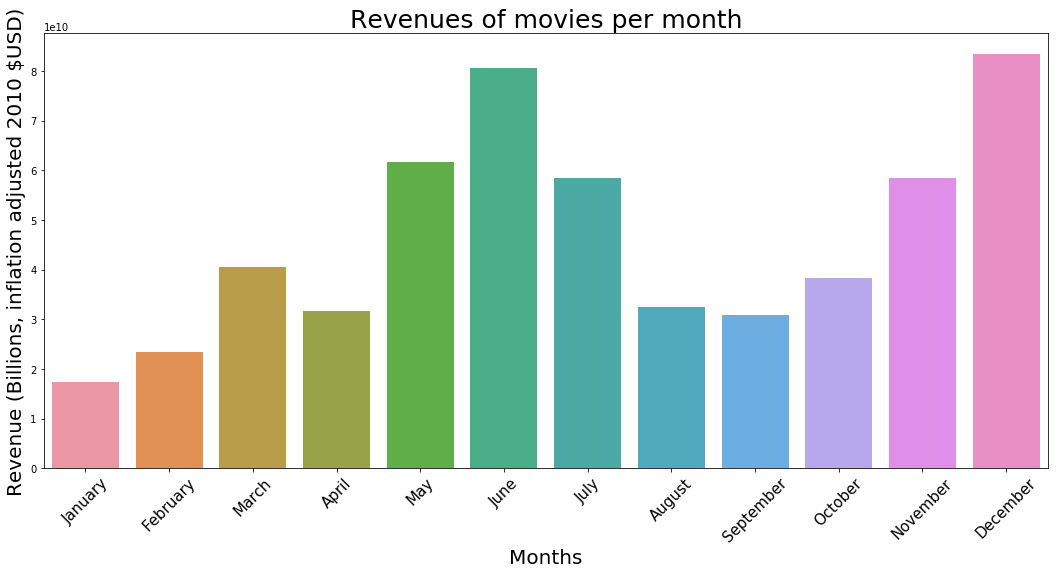

In [57]:
# Revenue vs. Release Date (by month)
month_list = ['January', 'February', 'March', 'April', 
              'May', 'June', 'July', 'August', 
              'September', 'October', 'November', 'December']

index_release_date = df_tmdb_cleaned.set_index('release_date')

groupby_index = index_release_date.groupby([(index_release_date.index.month)])
month_revenue = groupby_index['revenue_adj_usd_2010'].sum()
month_revenue = pd.DataFrame(month_revenue)

month_revenue_bar = sns.barplot(x=month_revenue.index, y=month_revenue['revenue_adj_usd_2010'], data=month_revenue)
month_revenue_bar.figure.set_size_inches(18,8);
month_revenue_bar.axes.set_title('Revenues of movies per month', fontsize=25);
month_revenue_bar.set_xlabel("Months", fontsize=20);
month_revenue_bar.set_ylabel("Revenue (Billions, inflation adjusted 2010 $USD)", fontsize=20);
month_revenue_bar.set_xticklabels(month_list, rotation=45, size=15);

Highest reveneues for movies are associated with the months of December, June, May.

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

## Data conclusions

For question 1; here are some observations:
- The top 5 most common genres are: Drama, Comedy, Thriller, Action, Romance
- Over the years, the most popular genre is Adventure

For question 2; here are some observations:
- Who is starring in the movie is not a determining factor whether a movie has high revenue, although many high revenue movies employ A-list cast (i.e. Harrison Ford). For example, Mark Hamill, and Christian Bale, both well-known actors do not generate the same level of revenue for movies.
- Same with production company. Famous studios such as Lucasfilm are associated with movies with high revenue, although it is not a requirement for a movie to have high revenue.
- According to the matrix, a movie would have high vote count, budget, and popularity to generate high revenue.
- In the summer and winter months of May, June and December is when the highest revenues of a movie are seen.
- Most movies do not generate high revenue.

### Limitations:
- For the data, missing more than 30% of the data for budget and revenue is odd. The results would be more accurate had it not been missing.
- Data on popularity is missing depending on the year and genre for certain movies. (Gaps in plots)
- Thought about using the tagline column in the dataframe to answer the research questions (specifically revenue and how it influences revenue), but in the end decided not to. (Probably needs to use scipy for this)

In [58]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0

List of sites/resources:
- http://pandas.pydata.org/pandas-docs/stable/genindex.html
- https://stackoverflow.com/
- https://www.datacamp.com/community/blog/seaborn-cheat-sheet-python
- https://www.datacamp.com/community/blog/python-pandas-cheat-sheet
- https://www.dataquest.io/blog/pandas-cheat-sheet/
- https://seaborn.pydata.org/tutorial.html
- https://www.analyticsvidhya.com/blog/2017/02/top-28-cheat-sheets-for-machine-learning-data-science-probability-sql-big-data/
- https://pythonspot.com/matplotlib-bar-chart/
- https://www.github.com/
- And udacity notebook exercises